<a href="https://colab.research.google.com/github/Chickyonline/Chickyonline/blob/main/Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# This is a colab notebook (Selected from + Text menu)

# Google colab FAQ

In [ ]:
# This Step of unziping the zip file into its component files in my personal google drive is completed. So commenting it out from running again.
# !unzip "drive/MyDrive/Colab Notebooks/Dogbreed-Id/dog-breed-identification(1).zip" -d "drive/MyDrive/Colab Notebooks/Dogbreed-Id/"

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbre

# Check Resource allocated for the session

In [ ]:
import tensorflow as tf
print (f"Tensor Flow version : {tf.__version__}")

Tensor Flow version : 2.4.1


In [ ]:
# Import TF 2.x if it is not already available. Since our version is 2.4.1 above, we need not run this code now. This will make 2.4.1 as the default tensorflow version.
# try:
#   # %tensorflow_version only exists in Colab
#   %tensorflow_version 2.x
# except Exception:
#   pass

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print (f"TF version : {tf.__version__}")
print (f"Hub version : {hub.__version__}")

# check if GPU is allocated for our session
print ("GPU", "Available for Sak" if tf.config.list_physical_devices("GPU") else "not available.. try again later!")

TF version : 2.4.1
Hub version : 0.12.0
GPU not available.. try again later!


### Now that GPU is not allocated for us. 
1. Go to Runtime.
2. click view resources
3. Click "Change runtime type".
4. Where it says "Hardware accelerator", choose "GPU" (don't worry about TPU for now but feel free to research them).
5. Click save.
6. The runtime will be restarted to activate the new hardware, so you'll have to rerun the above cells.
7. If the steps have worked you should see a print out saying "GPU available".


In [ ]:
import tensorflow as tf
print ("GPU", "Available for Sak" if tf.config.list_physical_devices("GPU") else "not available.. try again later!")

GPU Available for Sak


# Visualising the data

## Loading Data into Colab
1. One method is to upload it to your Google Drive, mount your drive in this notebook and import the file.
2. Run the below cell which will provide a token to link your drive to this notebook

In [ ]:
# Running this cell will provide you with a token to link your drive to this notebook
# from google.colab import drive
# drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive

Following the prompts from the cell above, if everything worked, you should see a "drive" folder available under the Files tab.

This means we'll be able to access files in our Google Drive right in this notebook.

** For this project, I've downloaded the data from Kaggle and uploaded it to my Google Drive as a .zip file under the folder "Data".

** To access it, we'll have to unzip it.

In [ ]:
labels_csv = pd.read_csv("drive/MyDrive/Colab Notebooks/Dogbreed-Id/labels.csv")
print(len(labels_csv))
print(labels_csv.describe())
print(labels_csv.head())

10222
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     94e9f738b011bc5258d0593fbd9d4bb6  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


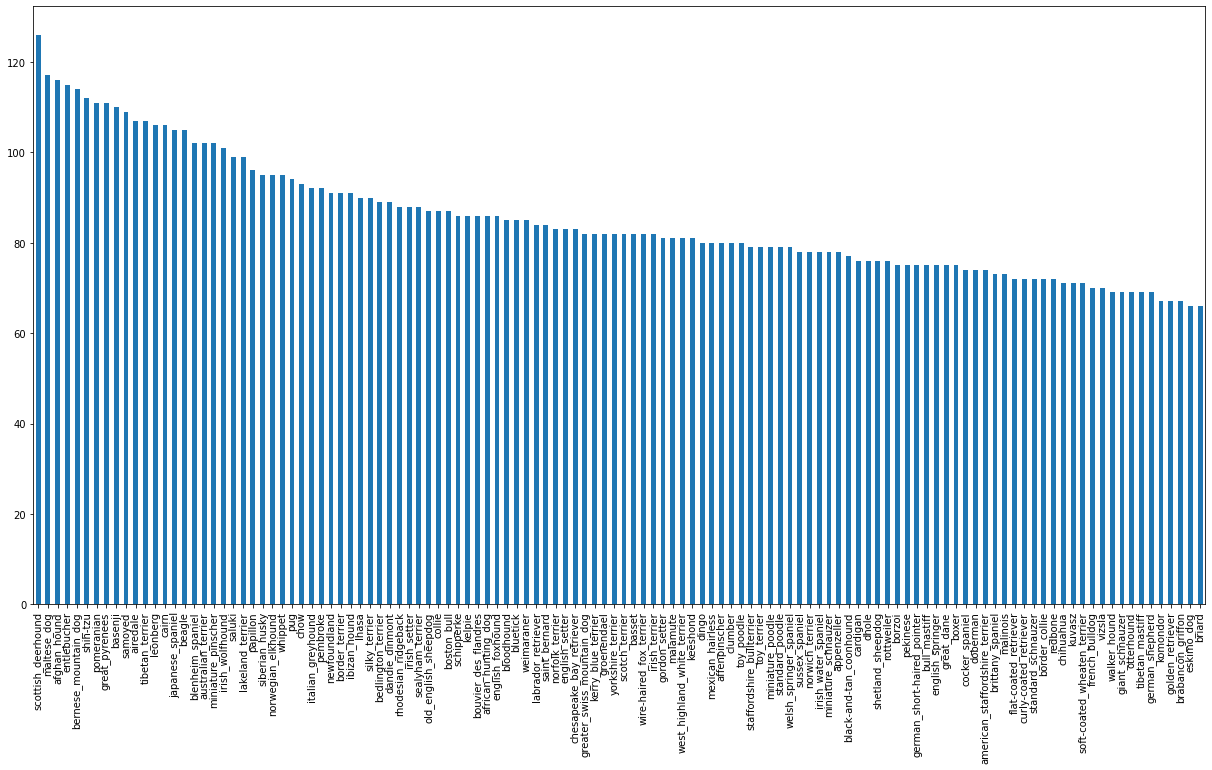

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize = (21, 11))

In [11]:
from IPython.display import display, Image


## Create the dataframe labels_csv

*   A list a filepaths to training images
*   An array of all labels
*   An array of all unique labels

### 1) Try to create `a list` of file path to the training images stored in google drive from the image id

In [ ]:
filename = ["drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filename[:10]       # display first 10

['drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Check if the number of file names match to the number of .jpg image files in training directory

In [8]:
import os
if len(os.listdir("drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/")) == len(filename):
  print("File names match to the number of image files")
else:
  print("File names do not match to number of image files : : check the zip file size and unzip completed or not")
  

File names match to the number of image files


In [9]:
filename[9001]      # filename is now a list of all file paths

'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/e212cce60c302d24e8aaf0fb87ee0b2c.jpg'

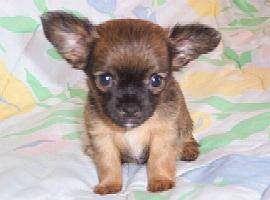

In [13]:
Image(filename[9002])

### 2) Try to create "a numpy array" of labels from labels_csv


In [15]:
import numpy as np
labels = labels_csv["breed"].to_numpy()     # convert labels column into a numpy array
labels [10:20]


array(['shetland_sheepdog', 'walker_hound', 'maltese_dog', 'bluetick',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer'],
      dtype=object)

Check if the number of labels match to the number of ids. i.e. file names

In [16]:
if (len(labels)) == len(filename):
  print("Number of labels is equal to number of filenames!!")
else:
  print("Number of labels not equal to number of filenames - check data in training.csv")

Number of labels is equal to number of filenames!!


### 3) get the unique breads from labels. 
ML cannot work with strings, so we need to convert each of the labels to numbers. Compare each of the label to the unique dog breeds and create a list of boolean indicating which one is a real label (True) and which one is not (False)

In [17]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

filename = [ list of all file path for training images ]

labels = [ list of all dog breed names ]

unique_breeds = [120 unique dog breed names ]

In [18]:
print(labels[0])
labels[0] == unique_breeds  # Compare Label[0] with the 120 values of unique breeds and put True where label matches

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [20]:
# Turning a boolean array into integers
print(labels[0])  # original label
print(np.where(unique_breeds == labels[0])[0][0])     # Index where label occurs
print (boolean_labels[0].argmax())      # Index where label occurs in the boolean array
print (boolean_labels[0].astype(int))   # print the array as 0 and 1 where the label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [21]:
# Setup X and Y variables
X = filename                      # Feature variables
y = boolean_labels                # labels

Since there are 10,000+ images, before training on the whole set, lets take a subset of 1000 image and complete building the logic.

In [22]:
# Set number of images for experiment
NUM_IMAGES = 1000 #@param { type:"slider", min:1000, max: 10000, step: 1000}
NUM_IMAGES


1000

let's split our data into training and validation sets. Use 80/20 split (80% training data, 20% validation data).

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [24]:
X_train[:5], y_train[:2]                 # image path and boolean array

(['drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

# Preprocess the images and turn it into tensors

Our labels are in numeric format but our images are still just file paths.


Since we're using TensorFlow, our data has to be in the form of Tensors.


A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.


Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:

    1. Takes an image filename as input.
    2. Uses TensorFlow to read the file and save it to a variable, image.
    3. Turn our image (a jpeg file) into Tensors.
    4. Resize the image to be of shape (224, 224).
    5. Return the modified image.

Reference material to read about this type of function is the TensorFlow documentation on loading images.

In [27]:
# Convert an image into a numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])    # Read an image
image.shape

(257, 350, 3)

This is height, width, colour channel value

This numpy array be converted to tensor by using tf.constant()




In [28]:
tf.constant(image)     # (page, row, column) format

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Create a function to convert each of the training images into tensors as above

In [29]:
IMG_SIZE = 224            # Set the size of image

def process_image(image_path):
  """
  Takes an image file path and converts it into a Tensor
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn jpeg image into a numerical tensor with 3 colour channels RGB
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the color channel values from 0-225 values to 0 - 1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image into the required format of (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Creating data batches

Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow BatchDataset).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.

In [31]:
# Create a function to return a tuple (image, label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, 
  processes the image and returns the tuple of (image, label)
  """
  image = process_image(image_path)
  return (image, label)

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [36]:
# Define batch size of 32
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(x) and label (y) pairs.
  Shuffles the data if it's training data but doesnt shuffle if it's validation data set.
  Also accepts test data as input (without labels)
  """

  # If data is test data set, we will not be having the labels
  if test_data:
    print("Creating test data batches...")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))  # only filepaths

    data_batch =  data.map(process_image).batch(BATCH_SIZE)

    return data_batch

  # If the data is validation dataset, we dont need to reshuffle it
  elif valid_data:
    print ("Creating validation data batches...")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),    # filepaths &
                                               tf.constant(y)))   # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If the data is training data set, then shuffle it as well
  else:
    # Shuffle data
    print ("Creating Training data batches...")

    # Turn filepath and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),    # filepaths &
                                               tf.constant(y)))   # labels

    # Shuffling the image path and labels is faster than shuffling the actual images
    data = data.shuffle(buffer_size = len(x))

    # Create (image, label) tuples.... this also turns the image path into pre-processed images
    data = data.map(get_image_label)

    # Convert to databatch
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [37]:
# Create Training and Validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating Training data batches...
Creating validation data batches...


### Now we have our data converted into Tensors that can be run on a GPU

In [38]:
# Check the attributes of the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

(None, 224, 224, 32).. here None represents the BATCH_SIZE of 32

## Visualise the data batches

In [46]:
import matplotlib.pyplot as plt

# Create a fuction for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch
  """
  # setup the figure
  plt.figure(figsize = (10, 10))

  # Loop thru for 25 images and display in a loop
  for i in range (25):
    # create subplots( 5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # display the images
    plt.imshow(images[i])
    # add image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn grid lines off
    plt.axis("off")

To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the "as_numpy_iterator()" method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to "next()" will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

Note: Running the cell below and loading images may take a little while.

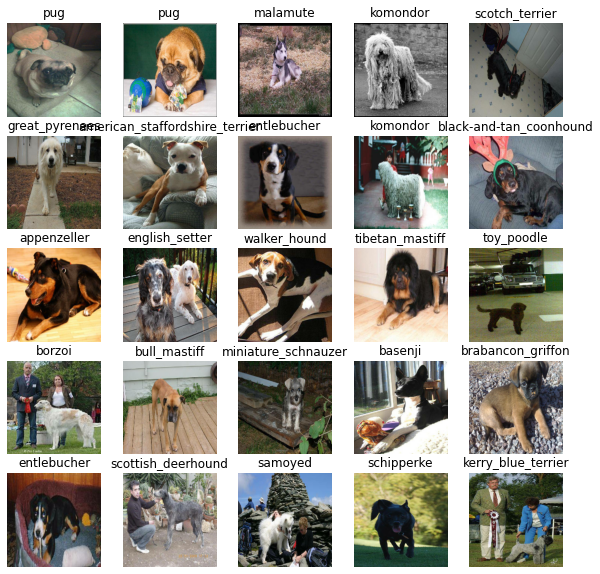

In [47]:
# Visualise Training images and labels in a training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

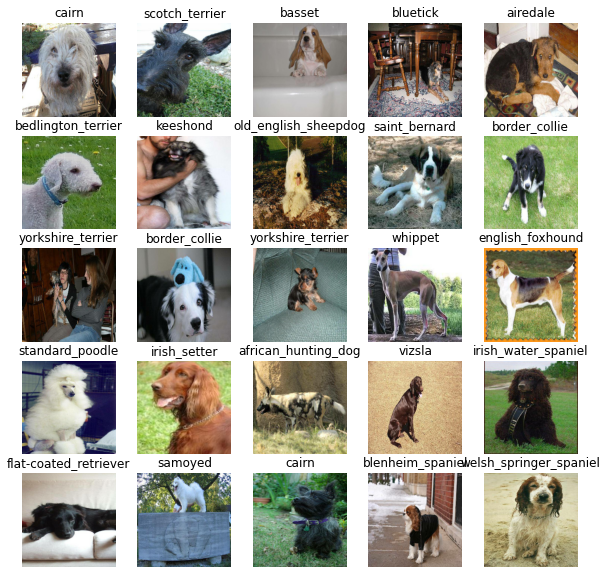

In [48]:
# Visualise the validation images from the validation data batch
val_images, val_labels = next (val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)